## 03. 평가 
성능 평가 지표(Evaluation Metric)은 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉜다. 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반한다. 기본적으로 예측 오차를 가지고 정규화 수준을 재가공하는 방법이 회귀의 성능 평가 지표 유형이다.    
본 장에서는 분류에 사용되는 성능 평가 지표에 대해 자세히 설명하겠다. 0이냐 1이냐 혹은 긍정/부정을 판단하는 이진 분류에서는 정확도보다는 다른 성능 지표가 더 중요시되는 경우가 많다. 먼저 분류의 성능 평가 지표를 살펴보자.   
* 정확도(Accuracy)
* 오차행렬(Confusion Matrix)  
* 정밀도(Precision)
* 재현율(Recall)
* F1 스코어
* ROC AUC   
위에서 언급한 분류의 성능 지표는 이진/멀티 분류 모두에 적용되는 지표이지만, 특히 이진 분류에서 더욱 중요하게 강조되는 지표이다. 

### 01. 정확도(Accuracy)
--- 
* **정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수**    


정확도는 직관적으로 모델 예측 성능을 나타내는 지표이다. 하지만 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기 때문에 정확도 수치 하나만 가지고 성능을 평가하지 않는다.   
특히 정확도는 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다. 예를 들어 100개의 데이터가 있고, 이 중에 90개의 데이터 레이블이 0, 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 된다.    

유명 MNIST 데이터 세트를 변환해 불균형한 데이터 세트로 만든 뒤에 정확도 지표 적용 시 어떤 문제가 발생할 수 있는지 살표보자. MNIST 데이터 세트는 0부터 9까지의 숫자 이미지의 픽셀 정보를 가지고 있으며, 이를 기반으로 숫자 Digit를 예측하는데 사용된다. 원래 MNIST 데이터 세트는 레이블 값이 0부터 9까지 있는 멀티 레이블 분류를 위한 것이다. 이것을 레이블 값이 7인 것만 True, 나머지 값은 모두 False로 변환해 이진 분류 문제로 바꿔 보겠다. 즉, 전체 데이터의 10%만 True, 나머지 90%는 False인 불균형한 데이터 세트로 변형하는 것이다. 
* MNIST 데이터셋을 multi classification에서 binary classificatio 으로 변경   
이렇게 불균형한 데이터 세트에 모든 데이터를 False, 즉 0으로 예측하는 classifier를 이용해 정확도를 측정하면 약 90%에 가까운 예측 정확도를 나타낸다. **아무것도 하지 않고 무조건 특정한 결과로 찍어도 데이터 분포도가 균일하지 않은 경우 높은 수치가 나타날 수 있는 것이 정확도 평가 지표의 맹점이다.**   

- 예제 코드로 확인해보기   
먼저 불균형한 데이터 세트와 Dummy Classifier를 생성한다.
 

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dumy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


450개의 테스트 데이터 세트에 수행한 예측 정확도는 90%이다. 단지 모든 것을 0으로만 예측해도 MyFakeClassifier의 정확도가 90%로 유수의 ML 알고리즘과 어깨를 겨룰 수 있다는 것은 말도 안되는 결과이다.    
이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능수치로 사용되서는 안 된다. 정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야 한다. 

### 02. 오차 행렬 
---
이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.  
오차 행렬은 다음과 같은 4분면 행렬에서 실제 레이블 클래스 값과 예측 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타낸다. 
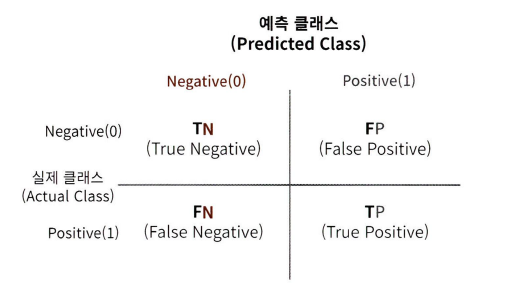
- 정확도 예제에서 다룬 MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현해 보겠다.



In [2]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

TN은 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건, FP는 Positive 1로 예측한 건수가 없으므로 0건, FP는 Positive 1로 예측한 건수가 없으므로 0건, FN은 Positive 1인 건수 45건을 Negative로 예측해서 False가 된 결과 45건, TP는 Positive 1로 예측한 건수가 없으므로 0건이다.

* 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 = (TN+TP) / (TN+FP+FN+TP)

일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결과값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여하는 경우가 많다.   
불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive 보다는 Negative로 예측 정확도가 높아지는 경향이 발생한다. 10,000건의 데이터 세트에서는 9,900건이 Negative이고 100건이 Positive라면 Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 된다. 결과적으로 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 된다.    
불균형한 데이터 세트에서 정확도만으로는 모델 신뢰도가 떨어질 수 있다. 정확도보다 더 선호되는 평가 지표인 정밀도(Precision)와 재현율(Recall)에 대해 알아보겠다.

### 03. 정밀도와 재현율
정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표이다.   
* 정밀도 = TP / (FP + TP)
* 재현율 = TP / (FN + TP)
정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. Positive 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표로 양성 예측도라고도 불린다.   
재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다. 공식의 분모인 FN + TP는 실제 값이 Positive인 모든 데이터 건수이며 공식의 분자인 TP는 예측과 실제 값이 Positive로 일치한 데이터 건수이다. 민감도(Sensitivity) 또는 TRR(True Positive)라고도 불린다.     
정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있다. ** 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 예를 들어 암 판단 모델은 재현율이 훨씬 중요한 지표이다. 보험 사기와 같은 금융 사기 적발 모델도 재현율이 중요하다. 실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것이다.   
정밀도가 더 중요한 지표인 경우도 있다. 예를 들어 스팸메일 여부를 판단하는 모델의 경우 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 돼 업무에 차질이 생긴다. 


* **재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**
* **정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성이 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우**    

재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN(실제 Positive, 예측 Negative)를 낮추는데, 정밀도는 FP를 낮추는 데 초점을 맞춘다. 이 같은 특성 때문에 재현율과 정밀도는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용된다. 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다.    

사이킷런은 정밀도 계산을 위해 precision_score()을, 재현율 계산을 위해 recall_score()을 API로 제공한다. 

* 오차 행렬 및 정밀도, 재현율을 모두 구해 예측 성능 평가해보기

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

* 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가를 수행하기

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

titanic_df = pd.read_csv('titanic_train.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

from sklearn import preprocessing 

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

데이터 세트 Null 값 개수 0


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.20, random_state=11)

Ir_clf = LogisticRegression()
Ir_clf.fit(X_train, y_train)
pred = Ir_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


재현율에 비해 정밀도가 낮게 나왔다.

#### 정밀도/재현율 트레이드오프 
---
분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있다. 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부른다.    
사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구한다. 그리고 예측 확률이 큰 레이블 값으로 예측하게 된다. 일반적으로 이진 분류에서는 이 임곗값을 0.5, 즉 50%로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정한다.    
사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다. predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다. predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과이다.    
predict()는 predict_proba() 호출 결과로 반환된 배열에서 분류 결정 임계값보다 큰 값이 들어 있는 칼럼의 위치를 받아서 최종적으로 예측 클래스를 결정하는 API이다.    

* 사이킷런의 predict()는 predict_proba() 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정한다. 이러한 구현을 위해 사이킷런의 Binarizer 클래스를 이용하겠다.    
* 다음 예제에서는 threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성한다. 생성된 Binarizer 객체의 fit_transform() 메서드를 이용해 넘파이 ndarray를 입력하면 입력된 ndarry의 값을 지정된 threshold보다 같거나 작으면 0값으로, 크면 1값으로 변환해 반환한다. 

In [18]:
pred_proba = Ir_clf.predict_proba(X_test)
perd = Ir_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46170212 0.53829788]
 [0.87864222 0.12135778]
 [0.87728507 0.12271493]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46170212 0.53829788 1.        ]
 [0.87864222 0.12135778 0.        ]
 [0.87728507 0.12271493 0.        ]]


반환 결과인 ndarray는 0과 1에 대한 확률을 나타내므로 첫 번째 칼럼 값과 두 번째 칼럼 값을 더하면 1이 된다. 맨 마지막 줄의 predict() 메서드의 결과 비교에서도 나타나듯이, 두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측하고 있다.

In [12]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], 
     [2, 0, 0],
     [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


입력된 X 데이터 세트에서 Binarizer의 threshold 값이 1.1보다 같거나 작으면 0, 크면 1로 반환되었다. 이제 이 Binarizer를 이용해 사이킷런의 predict()의 의사(pseudo) 코드를 만들어 보겠다. 바로 앞 예제의 LogisticRegression 객체의 predict_proba() 메서드로 구한 각 클래스별 예측 확률값인 pred_proba 객체 변수에 분류 결정 임곗값(threshold)을 0.5로 지정한 Binarizer 클래스를 적용해 최종 예측값을 구하는 방식이다. 이렇게 구한 최종 예측값에 대해 get_clf_eval() 함수를 적용해 평가 지표도 출력하겠다.

In [13]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer을 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


이 의사코드로 계산된 평가 지표는 로지스틱 회귀 Classifier 객체에서 호출된 predict()로 계산된 지표 값과 정확히 같다. predict()가 predict_proba()에 기반함을 알 수 있다.

* 만약 이 분류 결정 임계값을 0.4로 낮추면 평가 지표가 어떻게 변할까?

In [14]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임계값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361


임계값을 낮추니 재현율 값이 올라가고 정밀도가 떨어졌다. 왜냐하면 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 된다. 확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 때문에 임계값을 낮출수록 True 값이 많아지게 된다.   
Positive 예측값이 맣아지면 상대적으로 재현율 값이 높아진다. 양성 예측을 많이 하다보니 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문이다. 
* precision_recall_curve(): 사이킷런에서 임계값별 정밀도, 재현율 값을 배열로 반환해줌


#### 정밀도와 재현율의 맹점
---
Positive 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다. 임계값의 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다. 정밀도와 재현율의 수치가 적절하게 조합돼 분류의 종합적인 성능 평가에 사용될 수 있는 평가 지표가 필요하다.

### 04. F1 스코어
---
F1 스코어(Score)는 정밀도와 재현율을 결합한 지표이다. F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다. 
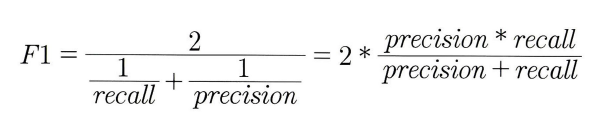
사이킷런은 F1 스코어를 구하기 위해 f1_score() 라는 API를 제공한다. 이를 이용해 정밀도와 재현율 절의 예제에서 학습/예측한 로지스틱 회귀 기반 타이타닉 생존자 모델의 F1 스코어를 구해보겠다. 

In [15]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


임계값 0.4 ~ 0.6 별로 정확도, 정밀도, 재현율, F1 스코어를 알아보면 F1 스코어는 임계값이 0.6일 때 가장 좋은 값을 보여준다. 하지만 이 경우 재현율이 크게 감소하고 있다는 것을 주의해야 한다. 

### 05. ROC 곡선과 AUC
ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표이다. ROC 곡선(Receiver Operation Characteristic Curve)는 일반적으로 의학 분야에서 많이 사용되지만, 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 하다. ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선이다. FPR을 X 축으로, TPR을 Y 축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.    
TPR은 True Positive Rate의 약자이며, 이는 재현율을 나타낸다. 따라서 TPR은 TP / (FN + TP)이다. TPR, 즉 재현율은 민감도로 불린다. 그리고 민감도에 대응하는 지표로 TNR(True Negative Rate)라고 불리는 특이성(Specificity)가 있다.
* 민감도(TPR): 실제값 Positive(양성)가 정확히 예측되야 하는 수준을 나타낸다.(질병이 있는 사람은 질병이 있는 것으로 양성 판정)
* 특이성(TNR): 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타낸다.(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)   
TNR(True Negative Rate) = TN / (FP + TN)   
FPR(False Positive Rate) = FP / (FP + TN) = 1 - TNR = 1 - 특이성  
* ROC 곡선: 가운데 직선에 가까울수록 성능이 떨어지는 것이며, 멀어질수록 성능이 뛰어난 것이다. 
* 사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공한다. 
* roc_curve()를 이용해 타이타닉 생존자 예측 모델의 FPR, TPR, 임계값을 구해보기

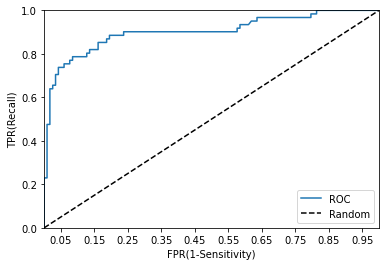

In [23]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1); plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

일반적으로 ROC 곡선 자체는 FPR과 TPR의 변화 값을 보는 데 이용하며 분류의 성능 지표로 사용되는 것을 ROC 곡선 면적에 기반한 AUC 값으로 결정한다. AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다. AUC 수치가 커지려면 FPR이 작은 상태에서 얼마나 큰 TPR을 얻을 수 있느냐가 관건이다. 가운데 직선에서 멀어지고 왼쪽 상단 모서리 쪽으로 가파르게 곡선이 이동할후록 직사각형에 가까운 곡선이 되어 면적이 1에 가까워지는 좋은 ROC AUC 성능 수치를 얻게 된다. 가운데 대각선 직선은 랜덤 수준의(동전 던지기 수준) 이진 분류 AUC 값으로 0.5이다. 따라서 보통의 분류는 0.5 이상의 AUC 값을 가진다.